In [ ]:
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.applications.inception_v3 import InceptionV3

import matplotlib.pyplot as plt
import numpy as np
import splitfolders
import os
import shutil

In [ ]:
! pip install -q kaggle

In [ ]:
!pip install split-folders

In [ ]:
# kaggle.json contains the necessary API username and key to use Kaggle
!ls -lha kaggle.json &> /dev/null 

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
# hides Kaggle API key from users on server
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d iamsouravbanerjee/indian-food-images-dataset &> /dev/null 
!kaggle datasets download -d anshulmehtakaggl/themassiveindianfooddataset &> /dev/null 


In [ ]:
!mkdir our_data

In [ ]:
!unzip /content/indian-food-images-dataset.zip &> /dev/null 
!unzip /content/themassiveindianfooddataset.zip &> /dev/null

In [ ]:
!mkdir "/content/dataset1"
!mkdir "/content/dataset2"

In [ ]:
# splitfolders will split folders into train, valid, and test folders
splitfolders.ratio('/content/Indian Food Images/Indian Food Images', output="/content/dataset1", seed=1337, ratio=(.4, 0.4,0.2)) 

Copying files: 4000 files [00:03, 1135.33 files/s]


In [ ]:
!mv /content/Biryani-resize /content/our_data/
!mv /content/Chole-Bhature-Resized /content/our_data/
!mv /content/Jalebi-Resize /content/our_data/
!mv /content/Kofta-Resized /content/our_data/
!mv /content/Naan-Resized /content/our_data/
!mv /content/Paneer-Tikka-resized /content/our_data/
!mv /content/Pani-Puri-resize /content/our_data/
!mv /content/Pav-Bhaji-Resized/ /content/our_data/
!mv /content/Vadapav-Resized/ /content/our_data/
!mv /content/dabeli-resize /content/our_data/
!mv /content/dal_resized /content/our_data/
!mv /content/dhokla-resize /content/our_data/
!mv /content/dosa_resized /content/our_data/
!mv /content/kathi-resize /content/our_data/
!mv /content/pakora-resize /content/our_data/

In [ ]:
def moveFiles(source_folder, destination_folder):
  # fetch all files
  for file_name in os.listdir(source_folder):
      file_name_jpg = file_name[:-4] + ".jpg"

      # construct full file path
      source = source_folder + file_name

      ### convert .png to .jpg
      im1 = Image.open(r"{}".format(source))
      # remove alpha channel (RGBA)
      im1 = im1.convert('RGB')

      jpg_filepath = source_folder + file_name_jpg
      im1.save(r"{}".format(jpg_filepath))
      ### 

      source_jpg = source_folder + file_name_jpg
      destination = destination_folder + file_name_jpg

      # move only .jpg files
      if os.path.isfile(source_jpg):
          shutil.move(source_jpg, destination)

In [ ]:
moveFiles("/content/our_data/Biryani-resize/resize/","/content/our_data/Biryani-resize/") 
moveFiles("/content/our_data/Chole-Bhature-Resized/Chole-Bhature-Resized/","/content/our_data/Chole-Bhature-Resized/")
moveFiles("/content/our_data/Jalebi-Resize/Jalebi-Resize/","/content/our_data/Jalebi-Resize/")
moveFiles("/content/our_data/Kofta-Resized/Kofta-Resized/","/content/our_data/Kofta-Resized/")
moveFiles("/content/our_data/Naan-Resized/Naan-Resized/","/content/our_data/Naan-Resized/")
moveFiles("/content/our_data/Paneer-Tikka-resized/Paneer-Tikka-resized/","/content/our_data/Paneer-Tikka-resized/")
moveFiles("/content/our_data/Pani-Puri-resize/resize/","/content/our_data/Pani-Puri-resize/")
moveFiles("/content/our_data/Pav-Bhaji-Resized/Pav-Bhaji-Resized/","/content/our_data/Pav-Bhaji-Resized/")
moveFiles("/content/our_data/Vadapav-Resized/Vadapav-Resized/","/content/our_data/Vadapav-Resized/")
moveFiles("/content/our_data/dal_resized/dal_resized/","/content/our_data/dal_resized/")
moveFiles("/content/our_data/pakora-resize/pakora-resize/","/content/our_data/pakora-resize/")
moveFiles("/content/our_data/dhokla-resize/dhokla-resize/","/content/our_data/dhokla-resize/")
moveFiles("/content/our_data/dosa_resized/dosa_resized/","/content/our_data/dosa_resized/")
moveFiles("/content/our_data/dabeli-resize/dabeli-resize/","/content/our_data/dabeli-resize/")
moveFiles("/content/our_data/kathi-resize/kathi-resize/","/content/our_data/kathi-resize/")

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
!rm -rf "/content/our_data/Biryani-resize/resize/" 
!rm -rf "/content/our_data/Chole-Bhature-Resized/Chole-Bhature-Resized/" 
!rm -rf "/content/our_data/Jalebi-Resize/Jalebi-Resize/"
!rm -rf "/content/our_data/Kofta-Resized/Kofta-Resized/"
!rm -rf "/content/our_data/Naan-Resized/Naan-Resized/"
!rm -rf "/content/our_data/Paneer-Tikka-resized/Paneer-Tikka-resized/"
!rm -rf "/content/our_data/Pani-Puri-resize/resize/"
!rm -rf "/content/our_data/Pav-Bhaji-Resized/Pav-Bhaji-Resized/"
!rm -rf "/content/our_data/Vadapav-Resized/Vadapav-Resized/"
!rm -rf "/content/our_data/dal_resized/dal_resized/"
!rm -rf "/content/our_data/pakora-resize/pakora-resize/"
!rm -rf "/content/our_data/dhokla-resize/dhokla-resize/"
!rm -rf "/content/our_data/dosa_resized/dosa_resized/"
!rm -rf "/content/our_data/dabeli-resize/dabeli-resize/"
!rm -rf "/content/our_data/kathi-resize/kathi-resize/"

In [ ]:
splitfolders.ratio('/content/our_data', output="/content/dataset2", seed=1337, ratio=(.4, 0.4,0.2)) 

Copying files: 4770 files [00:00, 5269.07 files/s]


In [ ]:
# move all files into the folder our_data
with open("List of Indian Foods.txt", "r") as a_file:
  for line in a_file:
    stripped_line = line.strip()
    !mv "/content/Indian Food Images/Indian Food Images/{stripped_line}" "/content/our_data" &> /dev/null 



In [ ]:
# most subfolders were not removed from the Indian Food Images folder, so we repeat the process
with open("List of Indian Foods.txt", "r") as a_file:
  for line in a_file:
    stripped_line = line.strip()
    !mv "/content/our_data/Indian Food Images/{stripped_line}" "/content/our_data" &> /dev/null 

In [ ]:
# make new folders for same resize-named folders 
!mkdir "/content/our_data/chole_bhature"
!mkdir "/content/our_data/paneer_tikka"
!mkdir "/content/our_data/paneer_puri"
!mkdir "/content/our_data/pav_bhaji"
!mkdir "/content/our_data/vadapav"
!mkdir "/content/our_data/dal"
!mkdir "/content/our_data/pakora"
!mkdir "/content/our_data/dhokla"
!mkdir "/content/our_data/dosa"
!mkdir "/content/our_data/dabeli"
!mkdir "/content/our_data/kathi"

In [ ]:
!rm -rf themassiveindianfooddataset.zip indian-food-images-dataset.zip sample_data/ food20dataset

In [ ]:
# delete unneeded folders
!rm -rf "/content/Indian Food Images/"
!rm -rf "/content/our_data/Indian Food Images/"

In [ ]:
moveFiles("/content/our_data/Biryani-resize/","/content/our_data/biryani/") 
moveFiles("/content/our_data/Chole-Bhature-Resized/","/content/our_data/chole_bhature/")
moveFiles("/content/our_data/Jalebi-Resize/","/content/our_data/jalebi/")
moveFiles("/content/our_data/Kofta-Resized/","/content/our_data/kofta/")
moveFiles("/content/our_data/Naan-Resized/","/content/our_data/naan/")
moveFiles("/content/our_data/Paneer-Tikka-resized/","/content/our_data/paneer_tikka/")
moveFiles("/content/our_data/Pani-Puri-resize/","/content/our_data/paneer_puri/")
moveFiles("/content/our_data/Pav-Bhaji-Resized/","/content/our_data/pav_bhaji/")
moveFiles("/content/our_data/Vadapav-Resized/","/content/our_data/vadapav/")
moveFiles("/content/our_data/dal_resized/","/content/our_data/dal/")
moveFiles("/content/our_data/pakora-resize/","/content/our_data/pakora/")
moveFiles("/content/our_data/dhokla-resize/","/content/our_data/dhokla/")
moveFiles("/content/our_data/dosa_resized/","/content/our_data/dosa/")
moveFiles("/content/our_data/dabeli-resize/","/content/our_data/dabeli/")
moveFiles("/content/our_data/kathi-resize/","/content/our_data/kathi/")

In [ ]:
# remove unnecessary folders after moving files
!rm -rf "/content/our_data/kathi-resize/" "/content/our_data/dabeli-resize" "/content/our_data/dosa_resized" "/content/our_data/dhokla-resize/" "/content/our_data/pakora-resize/" "/content/our_data/dal_resized/" "/content/our_data/Vadapav-Resized/" "/content/our_data/Biryani-resize/" "/content/our_data/Chole-Bhature-Resized/" "/content/our_data/Jalebi-Resize/" "/content/our_data/Kofta-Resized/" "/content/our_data/Naan-Resized/" "/content/our_data/Paneer-Tikka-resized/" "/content/our_data/Pani-Puri-resize/" "/content/our_data/Pav-Bhaji-Resized/"

In [ ]:
#split folders that have both datasets
splitfolders.ratio('/content/our_data/', output="/content/our_data", seed=1337, ratio=(.4, 0.4,0.2)) 


Copying files: 8770 files [00:02, 3542.97 files/s]


In [ ]:
batch_size = 32
number_of_epochs = 2

In [ ]:
# preprocessing: data augmentation, dataset 1
datagen1_train = ImageDataGenerator(
    rotation_range=10,  
    zoom_range=0.2, 
    width_shift_range=0.4,  
    height_shift_range=0.1, 
    horizontal_flip=True, 
    vertical_flip=True,
    rescale = 1./255,
)  

datagen1_valid = ImageDataGenerator(rescale = 1./255,)

# input matrices
# load and iterate training dataset
train_data1 = datagen1_train.flow_from_directory(
    "/content/dataset1/train/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
valid_data1 = datagen1_valid.flow_from_directory(
    "/content/dataset1/val/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)



Found 1600 images belonging to 80 classes.
Found 1600 images belonging to 80 classes.


In [ ]:
# preprocessing: data augmentation, dataset 2
datagen2_train = ImageDataGenerator(
    rotation_range=10,  
    zoom_range=0.2, 
    width_shift_range=0.4,  
    height_shift_range=0.1, 
    horizontal_flip=True, 
    vertical_flip=True,
    rescale = 1./255,
)  

datagen2_valid = ImageDataGenerator(rescale = 1./255,)

# input matrices
# load and iterate training dataset
train_data2 = datagen2_train.flow_from_directory(
    "/content/dataset2/train/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
valid_data2 = datagen2_valid.flow_from_directory(
    "/content/dataset2/val/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)



Found 1902 images belonging to 15 classes.
Found 1902 images belonging to 15 classes.


In [ ]:
# preprocessing: data augmentation, both datasets
datagen_both_train = ImageDataGenerator(
    rotation_range=10,  
    zoom_range=0.2, 
    width_shift_range=0.4,  
    height_shift_range=0.1, 
    horizontal_flip=True, 
    vertical_flip=True,
    rescale = 1./255,
)  

datagen_both_valid = ImageDataGenerator(rescale = 1./255,)

# input matrices
# load and iterate training dataset
train_both = datagen_both_train.flow_from_directory(
    "/content/our_data/train/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
valid_both = datagen_both_valid.flow_from_directory(
    "/content/our_data/val/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)

Found 3502 images belonging to 91 classes.
Found 3502 images belonging to 91 classes.


In [ ]:
data1_size = 1600
data1_classes = 80

data2_size = 1902
data2_classes = 15

data_both_size = 3502
data_both_classes = 91

In [ ]:
datagen_test = ImageDataGenerator(rescale = 1./255,)
test_data1 = datagen_test.flow_from_directory(
    "/content/dataset1/test/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)

test_data2 = datagen_test.flow_from_directory(
    "/content/dataset2/test/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)

test_data_both = datagen_test.flow_from_directory(
    "/content/our_data/test/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)

Found 800 images belonging to 80 classes.
Found 966 images belonging to 15 classes.
Found 1766 images belonging to 91 classes.


In [ ]:
#callback for all experiments
es = EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
# 1st pre-trained experiment, with dataset 1

base_model =  InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_initializer=HeNormal())(x)
x = Dense(128, activation='relu', kernel_initializer=HeNormal())(x)
predictions = Dense(data1_classes, activation='softmax')(x)
inception_model = Model(inputs=base_model.input, outputs=predictions)


87924736/87910968 [==============================] - 2s 0us/step


In [ ]:
for layer in inception_model.layers:
  layer.trainable = False

added_layers = inception_model.layers[-3:]

for layer in added_layers:
  layer.trainable = True

In [ ]:
inception_model.compile(optimizer='adam', metrics=['categorical_accuracy'],
              loss='categorical_crossentropy')

inception_model.fit(train_data1,
          steps_per_epoch=data1_size/batch_size, 
          validation_data=valid_data1,
          validation_steps=data1_size/batch_size,
          epochs=number_of_epochs,
          callbacks=[es])

Epoch 1/2
50/50 [==============================] - 73s 1s/step - loss: 4.4704 - categorical_accuracy: 0.0150 - val_loss: 4.3243 - val_categorical_accuracy: 0.0231
Epoch 2/2
50/50 [==============================] - 52s 1s/step - loss: 4.2337 - categorical_accuracy: 0.0425 - val_loss: 4.0849 - val_categorical_accuracy: 0.0581


In [ ]:
print(inception_model.evaluate(test_data1))

25/25 [==============================] - 8s 335ms/step - loss: 4.0922 - categorical_accuracy: 0.0625
[4.092182636260986, 0.0625]


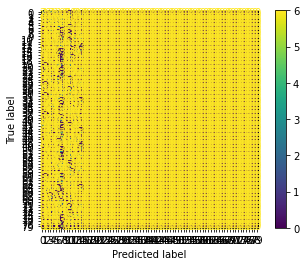

In [ ]:
y_pred = inception_model.predict(test_data1, data1_size/(batch_size))
y_pred = np.argmax(y_pred, axis=1)

label_list = list(range(data1_classes))

cm = confusion_matrix(test_data1.classes, y_pred, labels=label_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.rcParams["figure.figsize"] = (120,72)
plt.show()

In [ ]:
# 1st pre-trained experiment, with dataset 2
base_model =  InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_initializer=HeNormal())(x)
x = Dense(128, activation='relu', kernel_initializer=HeNormal())(x)
predictions = Dense(data2_classes, activation='softmax')(x)
inception_model = Model(inputs=base_model.input, outputs=predictions)



In [ ]:
for layer in inception_model.layers:
  layer.trainable = False

added_layers = inception_model.layers[-3:]

for layer in added_layers:
  layer.trainable = True

In [ ]:
inception_model.compile(optimizer='adam', metrics=['categorical_accuracy'],
              loss='categorical_crossentropy')

inception_model.fit(train_data2,
          steps_per_epoch=data2_size/batch_size, 
          validation_data=valid_data2,
          validation_steps=data2_size/batch_size,
          epochs=5,#number_of_epochs,
          callbacks=[es])

Epoch 1/5
59/59 [==============================] - 44s 660ms/step - loss: 1.1228 - categorical_accuracy: 0.6430 - val_loss: 0.8613 - val_categorical_accuracy: 0.7261
Epoch 2/5
59/59 [==============================] - 37s 626ms/step - loss: 0.9499 - categorical_accuracy: 0.6930 - val_loss: 0.7326 - val_categorical_accuracy: 0.7629
Epoch 3/5
59/59 [==============================] - 37s 629ms/step - loss: 0.8611 - categorical_accuracy: 0.7192 - val_loss: 0.6690 - val_categorical_accuracy: 0.7928
Epoch 4/5
59/59 [==============================] - 37s 627ms/step - loss: 0.8083 - categorical_accuracy: 0.7340 - val_loss: 0.6862 - val_categorical_accuracy: 0.7776
Epoch 5/5
59/59 [==============================] - 38s 635ms/step - loss: 0.7763 - categorical_accuracy: 0.7539 - val_loss: 0.7082 - val_categorical_accuracy: 0.7702


In [ ]:
print(inception_model.evaluate(test_data2))

31/31 [==============================] - 5s 162ms/step - loss: 0.7217 - categorical_accuracy: 0.7692
[0.7217150926589966, 0.7691511511802673]


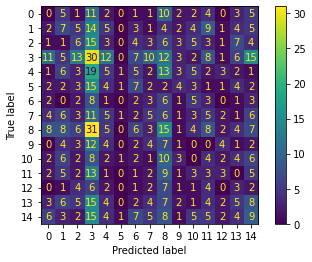

In [ ]:
y_pred = inception_model.predict(test_data2, data2_size/(batch_size))
y_pred = np.argmax(y_pred, axis=1)

label_list = list(range(data2_classes))

cm = confusion_matrix(test_data2.classes, y_pred, labels=label_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [ ]:
# 1st pre-trained experiment, with both datasets
base_model =  InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_initializer=HeNormal())(x)
x = Dense(128, activation='relu', kernel_initializer=HeNormal())(x)
predictions = Dense(data_both_classes, activation='softmax')(x)
inception_model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
for layer in inception_model.layers:
  layer.trainable = False

added_layers = inception_model.layers[-3:]

for layer in added_layers:
  layer.trainable = True

In [ ]:
inception_model.compile(optimizer='adam', metrics=['categorical_accuracy'],
              loss='categorical_crossentropy')

inception_model.fit(train_both,
          steps_per_epoch=data_both_size/batch_size, 
          validation_data=valid_both,
          validation_steps=data_both_size/batch_size,
          epochs=number_of_epochs,
          callbacks=[es])

In [ ]:
print(inception_model.evaluate(test_data_both))

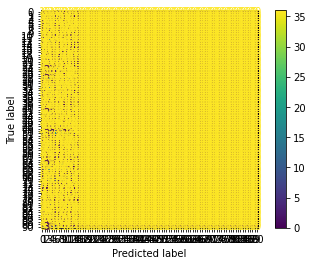

In [ ]:
y_pred = inception_model.predict(test_data_both, data_both_size/(batch_size))
y_pred = np.argmax(y_pred, axis=1)

label_list = list(range(data_both_classes))

cm = confusion_matrix(test_data_both.classes, y_pred, labels=label_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.rcParams["figure.figsize"] = (120,72)
plt.show()

In [ ]:
# 1st random experiment with Dataset 1

model = Sequential()
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(128, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(data1_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
model.fit(train_data1,
          steps_per_epoch=data1_size/batch_size,
          validation_data=valid_data1,
          validation_steps=data1_size/batch_size,
          epochs=number_of_epochs,
          callbacks=[es])

In [ ]:
print(model.evaluate(test_data1))

In [ ]:
y_pred = model.predict(test_data1, data1_size/(batch_size))
y_pred = np.argmax(y_pred, axis=1)

label_list = list(range(data1_classes))

cm = confusion_matrix(test_data1.classes, y_pred, labels=label_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.rcParams["figure.figsize"] = (120,72)
plt.show()

In [ ]:
#1st experiment with Dataset 2
model = Sequential()
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(128, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(data2_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
model.fit(train_data2,
          steps_per_epoch=data2_size/batch_size,
          validation_data=valid_data2,
          validation_steps=data2_size/batch_size,
          epochs=number_of_epochs,
          callbacks=[es])

In [ ]:
print(model.evaluate(test_data2))

In [ ]:
y_pred = model.predict(test_data2, data2_size/(batch_size))
y_pred = np.argmax(y_pred, axis=1)

label_list = list(range(data2_classes))

cm = confusion_matrix(test_data2.classes, y_pred, labels=label_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [ ]:
#1st random experiment with both datasets
model = Sequential()
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(128, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(data_both_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
model.fit(train_both,
          steps_per_epoch=data_both_size/batch_size,
          validation_data=valid_both,
          validation_steps=data_both_size/batch_size,
          epochs=number_of_epochs,
          callbacks=[es])

In [ ]:
print(model.evaluate(test_data_both))

In [ ]:
y_pred = model.predict(test_data_both, data_both_size/(batch_size))
y_pred = np.argmax(y_pred, axis=1)

label_list = list(range(data_both_classes))

cm = confusion_matrix(test_data_both.classes, y_pred, labels=label_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.rcParams["figure.figsize"] = (120,72)
plt.show()

NameError: ignored

In [ ]:
# 2nd pre-trained experiment with Dataset 1
base_model =  InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = Conv2D(6,(5,5), activation='relu', kernel_initializer=HeNormal(), input_shape=(224,224,3,))(x)
x = Dropout(0.3)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_initializer=HeNormal())(x)
x = Dense(128, activation='relu', kernel_initializer=HeNormal())(x)

predictions = Dense(data1_classes, activation='softmax')(x)
inception_model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
inception_model.compile(optimizer='adam', metrics=['categorical_accuracy'],
              loss='categorical_crossentropy')

inception_model.fit(train_data1,
          steps_per_epoch=data1_size/batch_size, 
          validation_data=valid_data1,
          validation_steps=data1_size/batch_size,
          epochs=1,
          callbacks=[es])


In [ ]:
print(inception_model.evaluate(test_data1))

In [ ]:
y_pred = inception_model.predict(test_data1, data1_size/(batch_size))
y_pred = np.argmax(y_pred, axis=1)

label_list = list(range(data1_classes))

cm = confusion_matrix(test_data1.classes, y_pred, labels=label_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.rcParams["figure.figsize"] = (120,72)
plt.show()

In [ ]:
# 2nd pre-trained experiment with dataset 2
base_model =  InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = Conv2D(6,(5,5), activation='relu', kernel_initializer=HeNormal(), input_shape=(224,224,3,))(x)
x = Dropout(0.3)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_initializer=HeNormal())(x)
x = Dense(128, activation='relu', kernel_initializer=HeNormal())(x)

predictions = Dense(data1_classes, activation='softmax')(x)
inception_model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
inception_model.compile(optimizer='adam', metrics=['categorical_accuracy'],
              loss='categorical_crossentropy')

inception_model.fit(train_data2,
          steps_per_epoch=data2_size/batch_size, 
          validation_data=valid_data2,
          validation_steps=data2_size/batch_size,
          epochs=1,
          callbacks=[es])

In [ ]:
print(inception_model.evaluate(test_data2))

In [ ]:
y_pred = inception_model.predict(test_data2, data2_size/(batch_size))
y_pred = np.argmax(y_pred, axis=1)

label_list = list(range(data2_classes))

cm = confusion_matrix(test_data2.classes, y_pred, labels=label_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [ ]:
# 2nd pre-trained experiment with both datasets
base_model =  InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = Conv2D(6,(5,5), activation='relu', kernel_initializer=HeNormal(), input_shape=(224,224,3,))(x)
x = Dropout(0.3)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_initializer=HeNormal())(x)
x = Dense(128, activation='relu', kernel_initializer=HeNormal())(x)

predictions = Dense(data1_classes, activation='softmax')(x)
inception_model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
inception_model.compile(optimizer='adam', metrics=['categorical_accuracy'],
              loss='categorical_crossentropy')

inception_model.fit(train_both,
          steps_per_epoch=data_both_size/batch_size, 
          validation_data=valid_both,
          validation_steps=data_both_size/batch_size,
          epochs=number_of_epochs,
          callbacks=[es])

In [ ]:
print(inception_model.evaluate(test_data_both))

In [ ]:
y_pred = inception_model.predict(test_data_both, data_both_size/(batch_size))
y_pred = np.argmax(y_pred, axis=1)

label_list = list(range(data_both_classes))

cm = confusion_matrix(test_data_both.classes, y_pred, labels=label_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.rcParams["figure.figsize"] = (120,72)
plt.show()

In [ ]:
#2nd random experiment with Dataset1
model = Sequential()
model.add(Conv2D(6, (5,5), activation='relu', kernel_initializer=HeNormal(), input_shape=(224,224,3,)))
model.add(Dropout(0.3))
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(128, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(data1_classes, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
model.fit(train_data1,
          steps_per_epoch=data1_size/batch_size,
          validation_data=valid_data1,
          validation_steps=data1_size/batch_size,
          epochs=number_of_epochs,
          callbacks=[es])

In [ ]:
print(model.evaluate(test_data1))

In [ ]:
y_pred = model.predict(test_data1, data1_size/(batch_size))
y_pred = np.argmax(y_pred, axis=1)

label_list = list(range(data1_classes))

cm = confusion_matrix(test_data_both.classes, y_pred, labels=label_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.rcParams["figure.figsize"] = (120,72)
plt.show()

In [ ]:
#2nd random experiment with Dataset 2
model = Sequential()
model.add(Conv2D(6, (5,5), activation='relu', kernel_initializer=HeNormal(), input_shape=(224,224,3,)))
model.add(Dropout(0.3))
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(128, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(data2_classes, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
model.fit(train_data2,
          steps_per_epoch=data2_size/batch_size,
          validation_data=valid_data2,
          validation_steps=data2_size/batch_size,
          epochs=number_of_epochs,
          callbacks=[es])

In [ ]:
print(model.evaluate(test_data2))

In [ ]:
y_pred = model.predict(test_data2, data2_size/(batch_size))
y_pred = np.argmax(y_pred, axis=1)

label_list = list(range(data2_classes))

cm = confusion_matrix(test_data2.classes, y_pred, labels=label_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [ ]:
#2nd random experiment with Both Datasets
model = Sequential()
model.add(Conv2D(6, (5,5), activation='relu', kernel_initializer=HeNormal(), input_shape=(224,224,3,)))
model.add(Dropout(0.3))
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(128, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(data_both_classes, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
model.fit(train_both,
          steps_per_epoch=data_both_size/batch_size,
          validation_data=valid_both,
          validation_steps=data_both_size/batch_size,
          epochs=2,
          callbacks=[es])

In [ ]:
print(model.evaluate(test_data_both))

In [ ]:
y_pred = model.predict(test_data_both, data_both_size/(batch_size))
y_pred = np.argmax(y_pred, axis=1)

label_list = list(range(data_both_classes))

cm = confusion_matrix(test_data_both.classes, y_pred, labels=label_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.rcParams["figure.figsize"] = (120,72)
plt.show()